Evaluation Project - 2

# HR Analytics Project - Understanding the Attrition in HR

Problem Statement:  
    
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?


Attrition affecting Companies  

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataset
df_hr=pd.read_csv("HR_Analytics_Data.csv")
df_hr

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [3]:
# First 10 rows
df_hr.head(10)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   
7   30        No      Travel_Rarely       1358  Research & Development   
8   38        No  Travel_Frequently        216  Research & Development   
9   36        No      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   
5                 2          2  Life Sciences              1               8   
6                 3          3        Medical              1              10   
7                24          1  Life Sciences              1              11   
8                23          3  Life Sciences              1              12   
9                27          3        Medical              1              13   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   
5  ...                         3            80                 0   
6  ...                         1            80                 3   
7  ...                         2            80                 1   
8  ...                         2            80                 0   
9  ...                         2            80                 2   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   
5                  8                      2               2               7   
6                 12                      3               2               1   
7                  1                      2               3               1   
8                 10                      2               3               9   
9                 17                      3               2               7   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  
5                  7                        3                     6  
6                  0                        0                     0  
7                  0                        0                     0  
8                  7                        1             

In [4]:
# Last 10 rows
df_hr.tail(10)

Age Attrition     BusinessTravel  DailyRate              Department  \
1460   29        No      Travel_Rarely        468  Research & Development   
1461   50       Yes      Travel_Rarely        410                   Sales   
1462   39        No      Travel_Rarely        722                   Sales   
1463   31        No         Non-Travel        325  Research & Development   
1464   26        No      Travel_Rarely       1167                   Sales   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1460                28          4        Medical              1   
1461                28          3      Marketing              1   
1462                24          1      Marketing              1   
1463                 5          3        Medical              1   
1464                 5          3          Other              1   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1460            2054  ...                         2            80   
1461            2055  ...                         2            80   
1462            2056  ...                         1            80   
1463            2057  ...                         2            80   
1464            2060  ...                         4            80   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1460                 0                  5                      3   
1461                 1                 20                      3   
1462                 1                 21                      2   
1463                 0                 10                      2   
1464                 0                  5                      2   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1460               1               5                  4   
1461               3               3                  2   
1462               2              20                  9   
1463               3               9                  4   
1464               3               4                  2   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9                  6   
1469               4               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
1460                        0                     4  
1461                        2                     0  
1462                        9                     6  
1463                        1                

In [5]:
# Sample
df_hr.sample(4)

Age Attrition     BusinessTravel  DailyRate              Department  \
1099   45        No      Travel_Rarely        538  Research & Development   
672    42        No      Travel_Rarely        462                   Sales   
218    45        No         Non-Travel       1052                   Sales   
605    38        No  Travel_Frequently        471  Research & Development   

      DistanceFromHome  Education    EducationField  EmployeeCount  \
1099                 1          4  Technical Degree              1   
672                 14          2           Medical              1   
218                  6          3           Medical              1   
605                 12          3     Life Sciences              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1099            1553  ...                         1            80   
672              936  ...                         1            80   
218              302  ...                         4            80   
605              837  ...                         3            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1099                 3                 10                      4   
672                  0                 10                      6   
218                  0                 23                      2   
605                  1                 13                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1099               3              10                  8   
672                3               5                  4   
218                3              19                  7   
605                2               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
1099                        7                     7  
672                         0                     3  
218                        12                     8  
605                         1                     2  

[4 rows x 35 columns]

In [6]:
df_hr.shape

(1470, 35)

This dataset containd 1470 rows and 35 columns.

# EDA

In [7]:
# Column Names
df_hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
df_hr.shape

(1470, 35)

In [9]:
# Column Data Types
df_hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

We can see that most of the datatypes are integer datatypes and a few object datatypes.

In [10]:
# Checking for null values
df_hr.isnull()

Age  Attrition  BusinessTravel  DailyRate  Department  \
0     False      False           False      False       False   
1     False      False           False      False       False   
2     False      False           False      False       False   
3     False      False           False      False       False   
4     False      False           False      False       False   
...     ...        ...             ...        ...         ...   
1465  False      False           False      False       False   
1466  False      False           False      False       False   
1467  False      False           False      False       False   
1468  False      False           False      False       False   
1469  False      False           False      False       False   

      DistanceFromHome  Education  EducationField  EmployeeCount  \
0                False      False           False          False   
1                False      False           False          False   
2                False      False           False          False   
3                False      False           False          False   
4                False      False           False          False   
...                ...        ...             ...            ...   
1465             False      False           False          False   
1466             False      False           False          False   
1467             False      False           False          False   
1468             False      False           False          False   
1469             False      False           False          False   

      EmployeeNumber  ...  RelationshipSatisfaction  StandardHours  \
0              False  ...                     False          False   
1              False  ...                     False          False   
2              False  ...                     False          False   
3              False  ...                     False          False   
4              False  ...                     False          False   
...              ...  ...                       ...            ...   
1465           False  ...                     False          False   
1466           False  ...                     False          False   
1467           False  ...                     False          False   
1468           False  ...                     False          False   
1469           False  ...                     False          False   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                False              False                  False   
1                False              False                  False   
2                False              False                  False   
3                False              False                  False   
4                False              False                  False   
...                ...                ...                    ...   
1465             False              False                  False   
1466             False              False                  False   
1467             False              False                  False   
1468             False              False                  False   
1469             False              False                  False   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0               False           False               False   
1               False           False               False   
2               False           False               False   
3               False           False               False   
4               False           False               False   
...               ...             ...                 ...   
1465            False           False               False   
1466            False           False               False   
1467            False           False               False   
1468            False           False               False   
1469            False           False               False   

      YearsSinceLas

In [11]:
# Checking for null values
df_hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null values present in the dataset.

<AxesSubplot:>

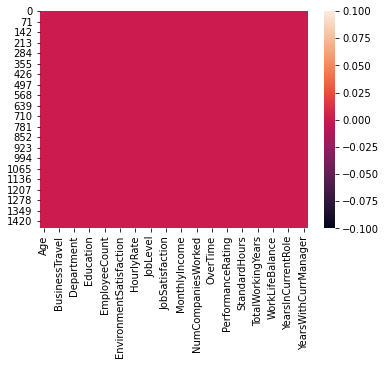

In [12]:
# Visualizing the null values
sns.heatmap(df_hr.isnull())

In [13]:
df_hr.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [14]:
# Mean of our target variable 'attrition'
df_hr.groupby('Attrition').mean()

Age   DailyRate  DistanceFromHome  Education  EmployeeCount  \
Attrition                                                                      
No         37.561233  812.504461          8.915653   2.927007            1.0   
Yes        33.607595  750.362869         10.632911   2.839662            1.0   

           EmployeeNumber  EnvironmentSatisfaction  HourlyRate  \
Attrition                                                        
No            1027.656123                 2.771290   65.952149   
Yes           1010.345992                 2.464135   65.573840   

           JobInvolvement  JobLevel  ...  RelationshipSatisfaction  \
Attrition                            ...                             
No               2.770479  2.145985  ...                  2.733982   
Yes              2.518987  1.637131  ...                  2.599156   

           StandardHours  StockOptionLevel  TotalWorkingYears  \
Attrition                                                       
No                  80.0          0.845093          11.862936   
Yes                 80.0          0.527426           8.244726   

           TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
Attrition                                                           
No                      2.832928         2.781022        7.369019   
Yes                     2.624473         2.658228        5.130802   

           YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
Attrition                                                                     
No                   4.484185                 2.234388              4.367397  
Yes                  2.902954                 1.945148              2.852321  

[2 rows x 26 columns]

In [15]:
df_hr.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EmployeeNumber           -0.010145  -0.050990          0.032916   0.042070   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StandardHours                  NaN        NaN               NaN        NaN   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EmployeeCount  EmployeeNumber  \
Age                                 NaN       -0.010145   
DailyRate                           NaN       -0.050990   
DistanceFromHome                    NaN        0.032916   
Education                           NaN        0.042070   
EmployeeCount                       NaN             NaN   
EmployeeNumber                      NaN        1.000000   
EnvironmentSatisfaction             NaN        0.017621   
HourlyRate                          NaN        0.035179   
JobInvolvement                      NaN       -0.006888   
JobLevel                            NaN       -0.018519   
JobSatisfaction                     NaN       -0.046247   
MonthlyIncome                       NaN       -0.014829   
MonthlyRate                         NaN        0.012648   
NumCompaniesWorked                  NaN       -0.001251   
PercentSalaryHike                   NaN       -0.012944   
PerformanceRating                   NaN       -0.020359   
RelationshipSatisfaction            NaN       -0.069861   
StandardHours                       NaN             NaN   
StockOptionLevel                    NaN        0.062227   
TotalWorkingYears                   NaN       -0.014365   
TrainingTimesLastYear               NaN        0.023603   
WorkLifeBalance                     NaN        0.010309   
YearsAtCompany                      NaN       -0.011240   
YearsInCurrentRole                  NaN       -0.008416   
YearsSinceLastPromotion             NaN       -0.009019   
YearsWithCurrManager                NaN       -0.009197   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Educat

<AxesSubplot:>

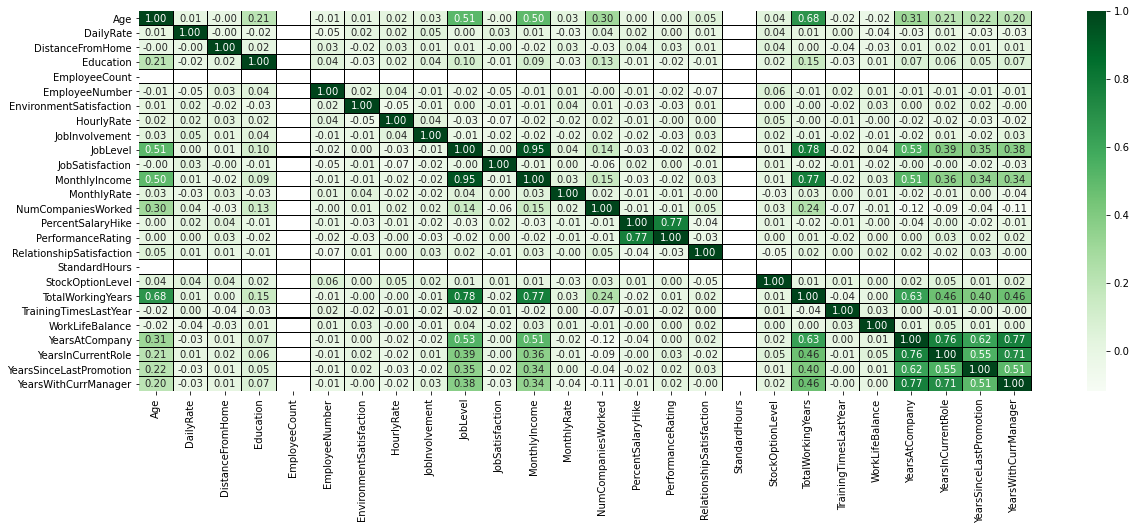

In [16]:
# Visualizing df_hr.corr() using heatmap
plt.figure(figsize=(20,7))
sns.heatmap(df_hr.corr(),annot=True,cmap='Greens',linewidths=0.1,linecolor="black",fmt=".2f")

From the above correlation heatmap, we see that "StandardHours" and "EmployeeCount" do not correlate with each other. We also see that "Monthly income" and "JobLevel" are highly positively correlated, followed by, "JobLevel" & "TotalWorkingYears".
Furthermore, "MonthlyIncome" and "TotalWorkingYears" & "PerformanceRating" and "PercentSalaryHike" are also highly correlated with each other.

OverTime, Marital Status, Distance from Home, Job Role, Department, NumCompaniesWorked, MonthlyRate are positively correlated with Attrition.  

TotalWorkingYears, JobLevel, YearsInCurrentRole, MonthlyIncome, Age, YearsWithCurrManager, StockOptionLevel, YearsAtCompany, JobInvolvement, JobSatisfaction, WorkLifeBalance, TrainingTimesLastYear, DailyRate, RelationshipSatisfaction,YearsSinceLastPromotion , Education are negatively correlated with Attrition.

PerformanceRating, BusinessTravel, HourlyRate have very less to no correlation with Attrition.

In [17]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [18]:
# Unique values of columns
df_hr.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [19]:
# Unique values of target variable column
df_hr['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [20]:
#Checking for any empty observation in target column
df_hr.loc[df_hr['Attrition'] == " "]

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]

No empty observations present.

In [21]:
df_hr['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

# Data Visualization

<AxesSubplot:xlabel='Age', ylabel='Count'>

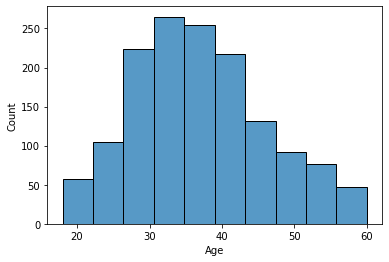

In [22]:
sns.histplot(data=df_hr,x="Age",bins=10)

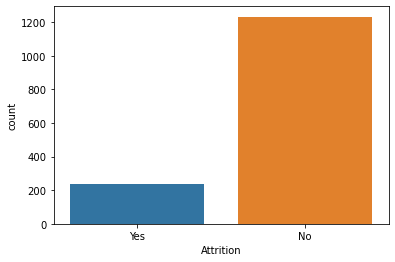

In [23]:
sns.countplot(df_hr['Attrition'])
plt.show()

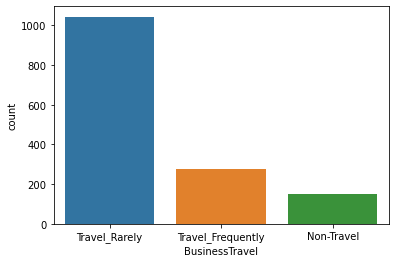

In [24]:
sns.countplot(df_hr['BusinessTravel'])
plt.show()

<AxesSubplot:xlabel='DailyRate', ylabel='Count'>

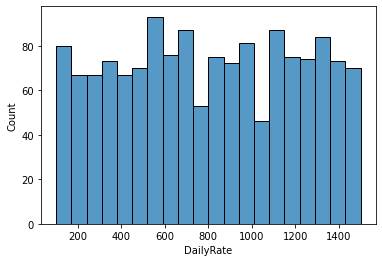

In [25]:
sns.histplot(data=df_hr,x="DailyRate",bins=20)

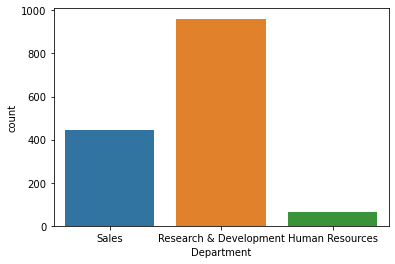

In [26]:
sns.countplot(df_hr['Department'])
plt.show()

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Count'>

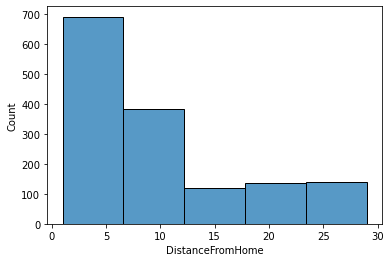

In [27]:
sns.histplot(data=df_hr,x="DistanceFromHome",bins=5)

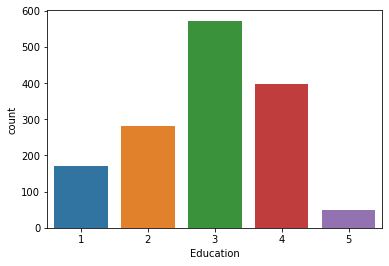

In [28]:
sns.countplot(df_hr['Education'])
plt.show()

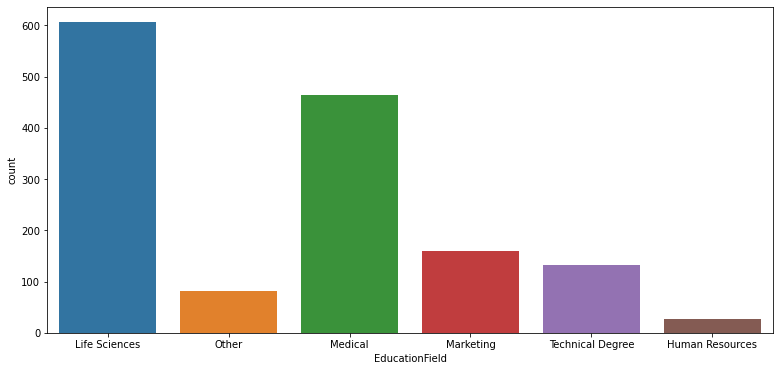

In [29]:
plt.figure(figsize=(13,6))
sns.countplot(df_hr['EducationField'])
plt.show()

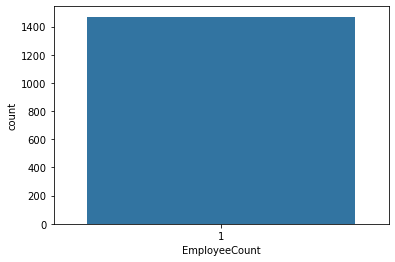

In [30]:
sns.countplot(df_hr['EmployeeCount'])
plt.show()

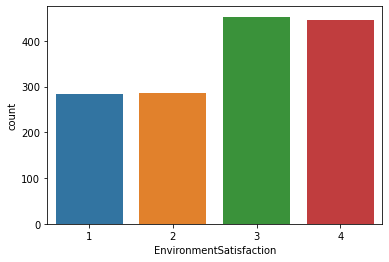

In [31]:
sns.countplot(df_hr['EnvironmentSatisfaction'])
plt.show()

Male      882
Female    588
Name: Gender, dtype: int64


<AxesSubplot:ylabel='Gender'>

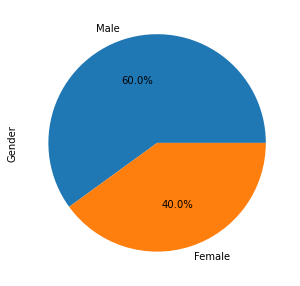

In [32]:
plt.figure(figsize=(10,5))
print(df_hr['Gender'].value_counts())
df_hr['Gender'].value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:xlabel='HourlyRate', ylabel='Count'>

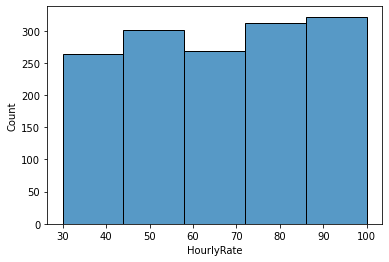

In [33]:
sns.histplot(data=df_hr,x="HourlyRate",bins=5)

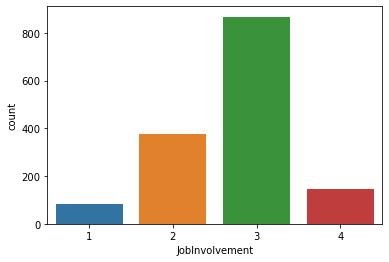

In [34]:
sns.countplot(df_hr['JobInvolvement'])
plt.show()

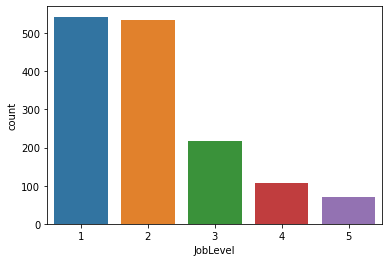

In [35]:
sns.countplot(df_hr['JobLevel'])
plt.show()

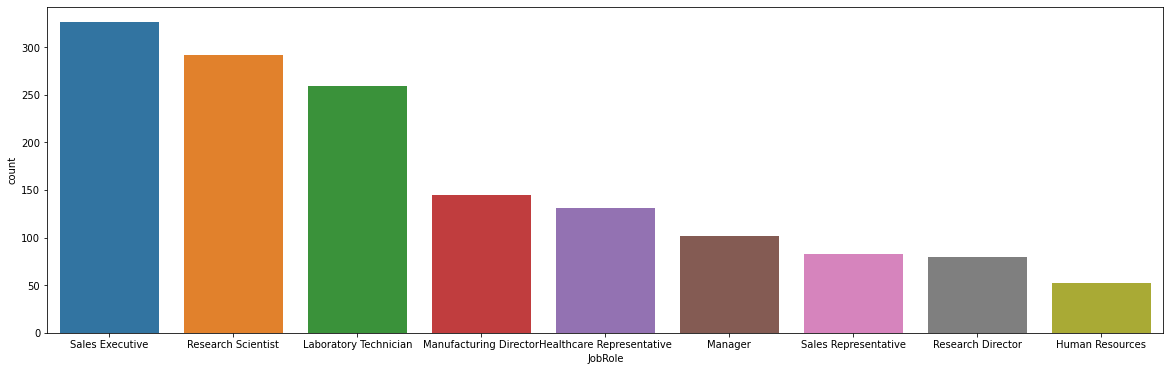

In [36]:
plt.figure(figsize=(20,6))
sns.countplot(df_hr['JobRole'])
plt.show()

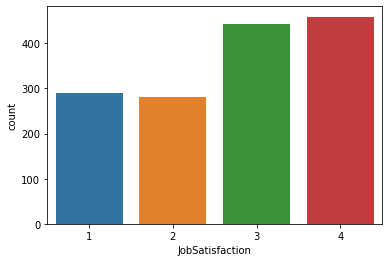

In [37]:
sns.countplot(df_hr['JobSatisfaction'])
plt.show()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


<AxesSubplot:ylabel='MaritalStatus'>

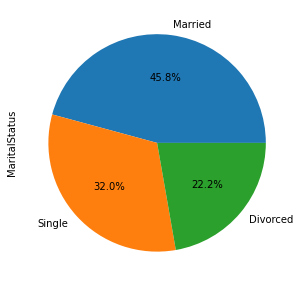

In [38]:
plt.figure(figsize=(10,5))
print(df_hr['MaritalStatus'].value_counts())
df_hr['MaritalStatus'].value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

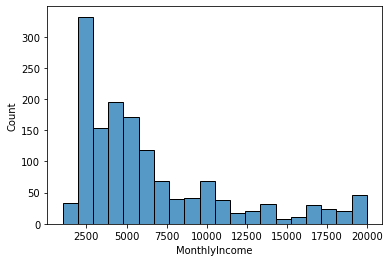

In [39]:
sns.histplot(data=df_hr,x="MonthlyIncome",bins=20)

<AxesSubplot:xlabel='MonthlyRate', ylabel='Count'>

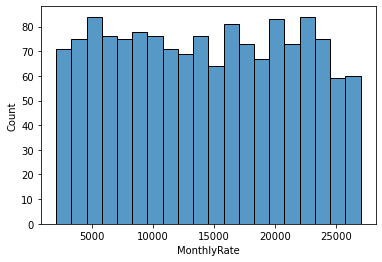

In [40]:
sns.histplot(data=df_hr,x="MonthlyRate",bins=20)

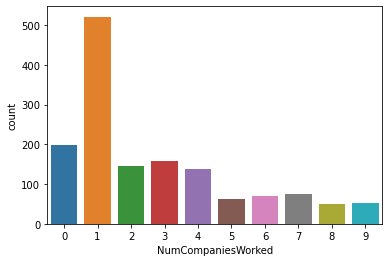

In [41]:
sns.countplot(df_hr['NumCompaniesWorked'])
plt.show()

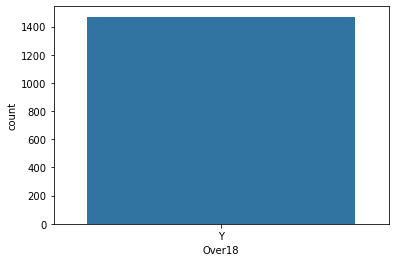

In [42]:
sns.countplot(df_hr['Over18'])
plt.show()

No     1054
Yes     416
Name: OverTime, dtype: int64


<AxesSubplot:ylabel='OverTime'>

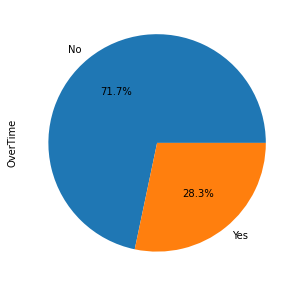

In [43]:
plt.figure(figsize=(10,5))
print(df_hr['OverTime'].value_counts())
df_hr['OverTime'].value_counts().plot.pie(autopct='%1.1f%%')

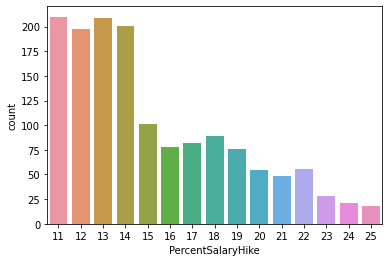

In [44]:
sns.countplot(df_hr['PercentSalaryHike'])
plt.show()

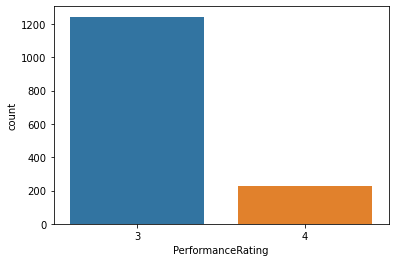

In [45]:
sns.countplot(df_hr['PerformanceRating'])
plt.show()

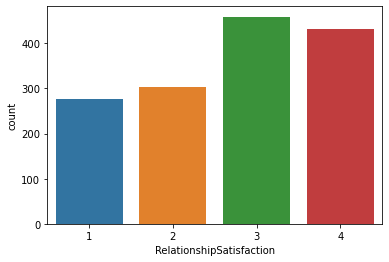

In [46]:
sns.countplot(df_hr['RelationshipSatisfaction'])
plt.show()

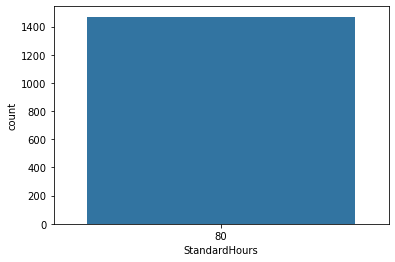

In [47]:
sns.countplot(df_hr['StandardHours'])
plt.show()

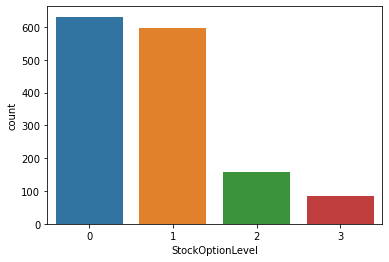

In [48]:
sns.countplot(df_hr['StockOptionLevel'])
plt.show()

<AxesSubplot:xlabel='TotalWorkingYears'>

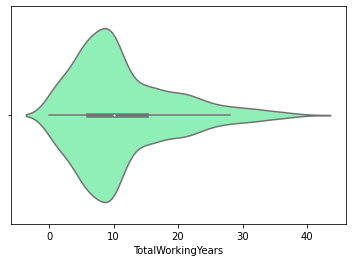

In [49]:
sns.violinplot(x="TotalWorkingYears",data=df_hr,palette='rainbow')

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Count'>

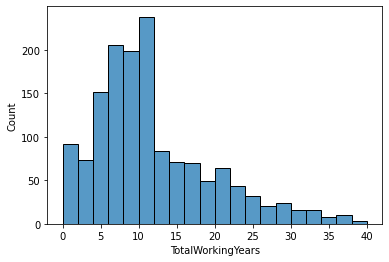

In [50]:
sns.histplot(data=df_hr,x="TotalWorkingYears",bins=20)

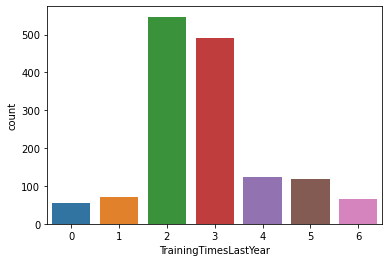

In [51]:
sns.countplot(df_hr['TrainingTimesLastYear'])
plt.show()

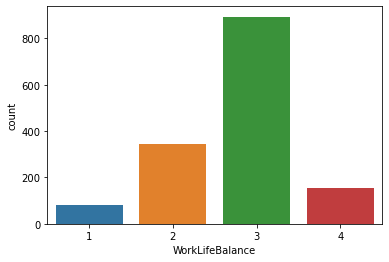

In [52]:
sns.countplot(df_hr['WorkLifeBalance'])
plt.show()

<AxesSubplot:xlabel='YearsAtCompany'>

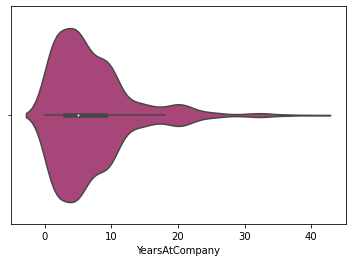

In [53]:
sns.violinplot(x="YearsAtCompany",data=df_hr,palette='magma')

<AxesSubplot:xlabel='YearsInCurrentRole'>

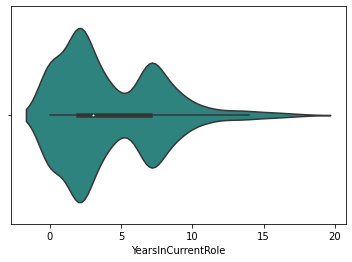

In [54]:
sns.violinplot(x="YearsInCurrentRole",data=df_hr,palette='viridis')

<AxesSubplot:xlabel='YearsSinceLastPromotion'>

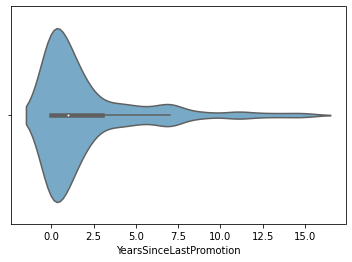

In [55]:
sns.violinplot(x="YearsSinceLastPromotion",data=df_hr,palette='Blues')

<AxesSubplot:xlabel='YearsWithCurrManager'>

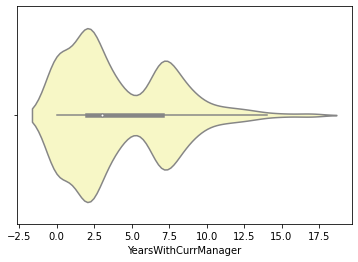

In [56]:
sns.violinplot(x="YearsWithCurrManager",data=df_hr,palette='Spectral')

<AxesSubplot:xlabel='Gender', ylabel='count'>

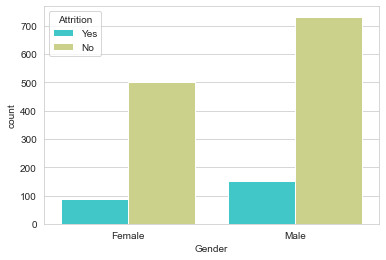

In [57]:
sns.set_style('whitegrid')
sns.countplot(x='Gender',hue='Attrition',data=df_hr,palette='rainbow')

<AxesSubplot:xlabel='OverTime', ylabel='count'>

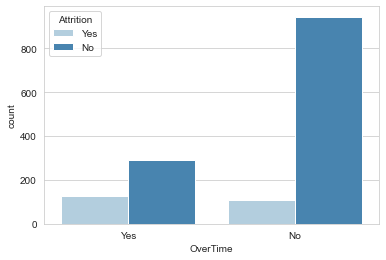

In [58]:
sns.set_style('whitegrid')
sns.countplot(x='OverTime',hue='Attrition',data=df_hr,palette='Blues')

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

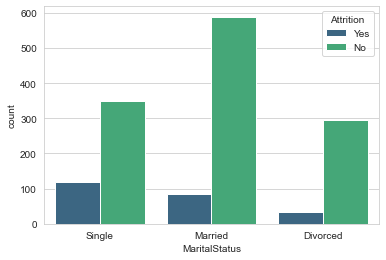

In [59]:
sns.set_style('whitegrid')
sns.countplot(x='MaritalStatus',hue='Attrition',data=df_hr,palette='viridis')

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

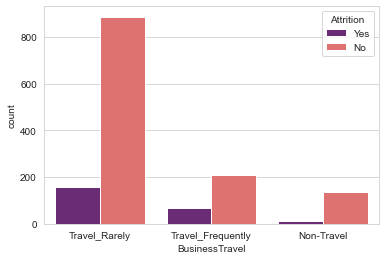

In [60]:
sns.set_style('whitegrid')
sns.countplot(x='BusinessTravel',hue='Attrition',data=df_hr,palette='magma')

<AxesSubplot:xlabel='Department', ylabel='count'>

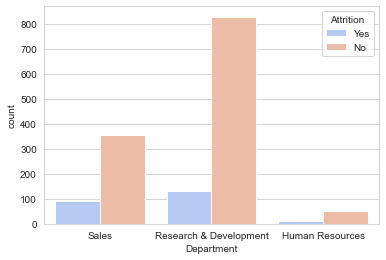

In [61]:
sns.set_style('whitegrid')
sns.countplot(x='Department',hue='Attrition',data=df_hr,palette='coolwarm')

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

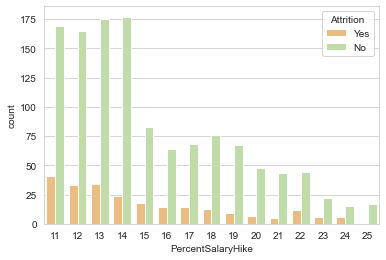

In [62]:
sns.set_style('whitegrid')
sns.countplot(x='PercentSalaryHike',hue='Attrition',data=df_hr,palette='Spectral')

<AxesSubplot:xlabel='Education', ylabel='count'>

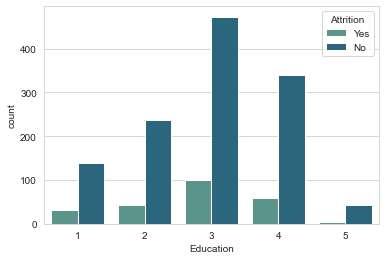

In [63]:
sns.set_style('whitegrid')
sns.countplot(x='Education',hue='Attrition',data=df_hr,palette='crest')

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

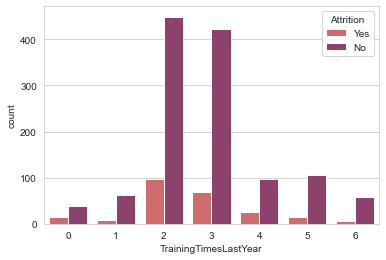

In [64]:
sns.set_style('whitegrid')
sns.countplot(x='TrainingTimesLastYear',hue='Attrition',data=df_hr,palette='flare')

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

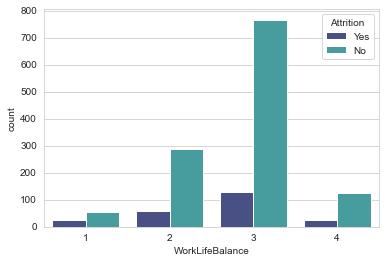

In [65]:
sns.set_style('whitegrid')
sns.countplot(x='WorkLifeBalance',hue='Attrition',data=df_hr,palette='mako')

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

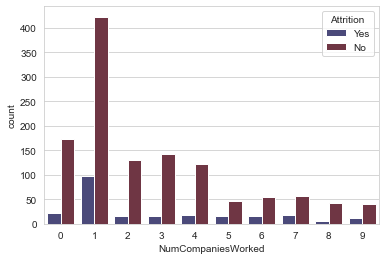

In [66]:
sns.set_style('whitegrid')
sns.countplot(x='NumCompaniesWorked',hue='Attrition',data=df_hr,palette='icefire')

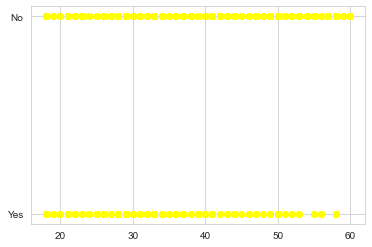

In [67]:
plt.scatter('Age','Attrition',data=df_hr,color='yellow')

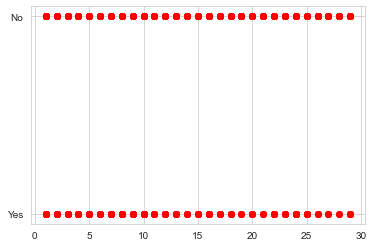

In [68]:
plt.scatter('DistanceFromHome','Attrition',data=df_hr,color='red')

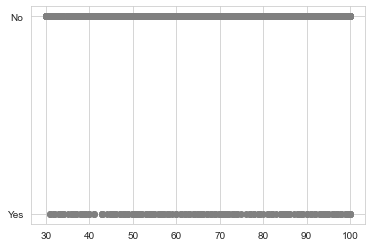

In [69]:
plt.scatter('HourlyRate','Attrition',data=df_hr,color='grey')

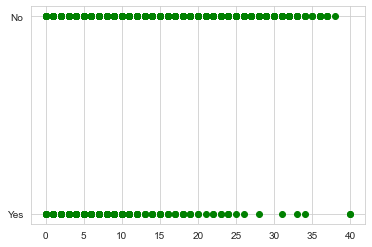

In [70]:
plt.scatter('TotalWorkingYears','Attrition',data=df_hr,color='green')

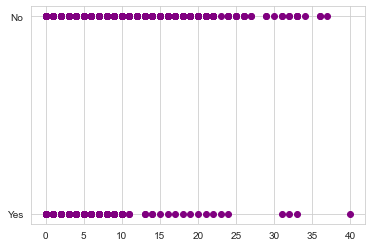

In [71]:
plt.scatter('YearsAtCompany','Attrition',data=df_hr,color='purple')

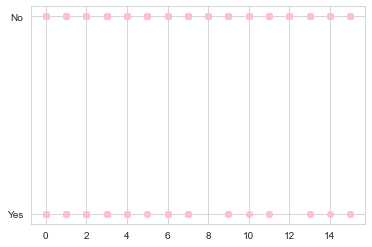

In [72]:
plt.scatter('YearsSinceLastPromotion','Attrition',data=df_hr,color='pink')

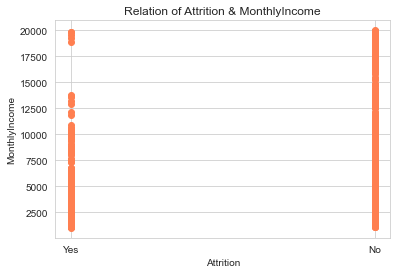

In [73]:
plt.scatter(df_hr['Attrition'], df_hr['MonthlyIncome'], color = 'coral')
plt.title('Relation of Attrition & MonthlyIncome')
plt.xlabel('Attrition')
plt.ylabel('MonthlyIncome')
plt.show()

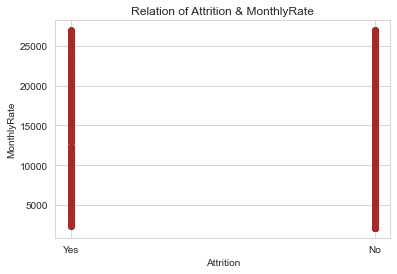

In [74]:
plt.scatter(df_hr['Attrition'], df_hr['MonthlyRate'], color = 'brown')
plt.title('Relation of Attrition & MonthlyRate')
plt.xlabel('Attrition')
plt.ylabel('MonthlyRate')
plt.show()

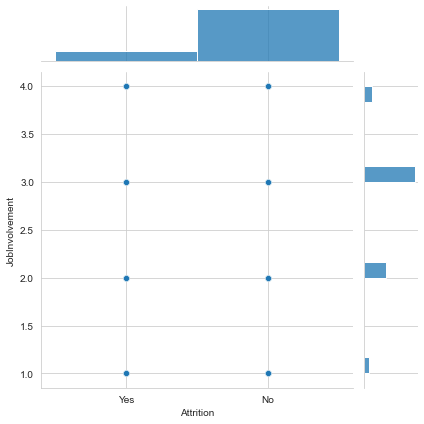

In [75]:
sns.jointplot(data=df_hr,x="Attrition",y="JobInvolvement")

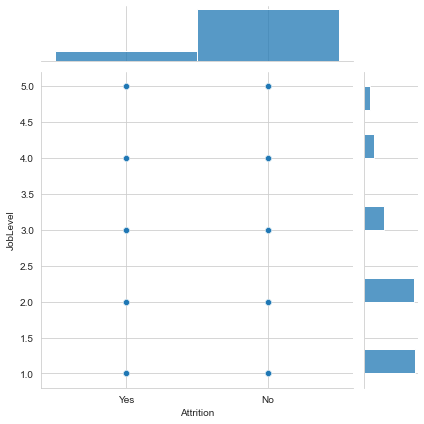

In [76]:
sns.jointplot(data=df_hr,x="Attrition",y="JobLevel")

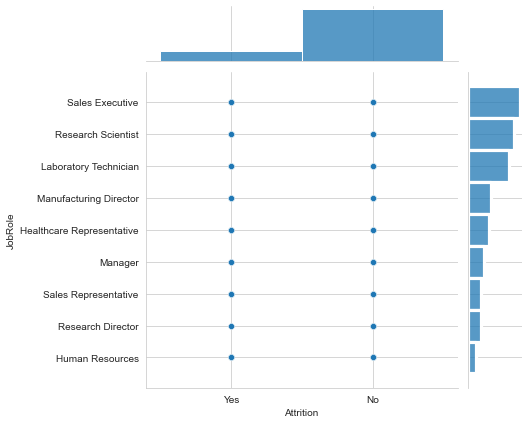

In [77]:
sns.jointplot(data=df_hr,x="Attrition",y="JobRole")

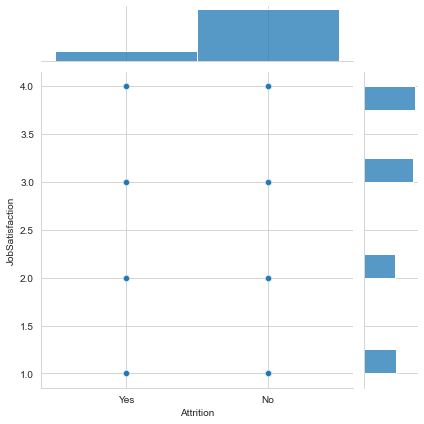

In [78]:
sns.jointplot(data=df_hr,x="Attrition",y="JobSatisfaction")

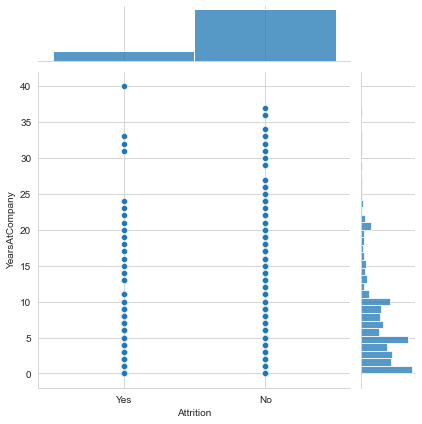

In [79]:
sns.jointplot(data=df_hr,x="Attrition",y="YearsAtCompany")

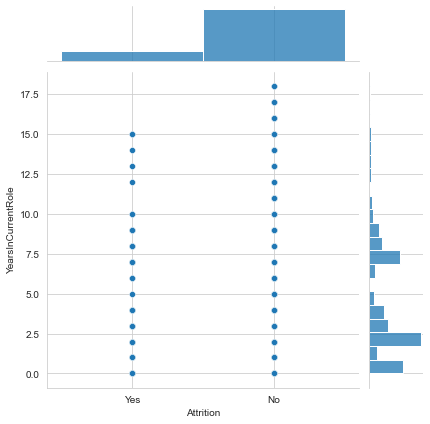

In [80]:
sns.jointplot(data=df_hr,x="Attrition",y="YearsInCurrentRole")

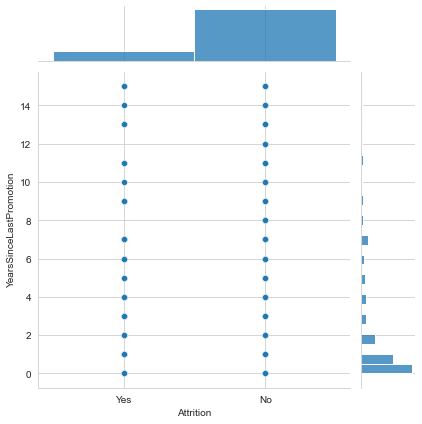

In [81]:
sns.jointplot(data=df_hr,x="Attrition",y="YearsSinceLastPromotion")

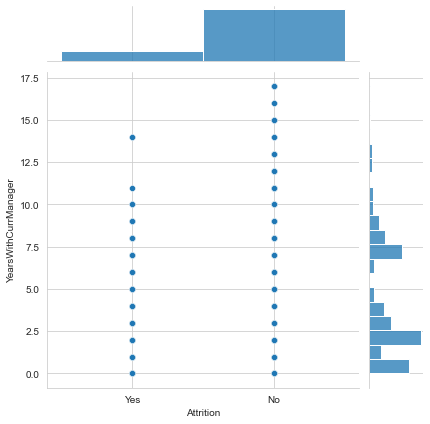

In [82]:
sns.jointplot(data=df_hr,x="Attrition",y="YearsWithCurrManager")

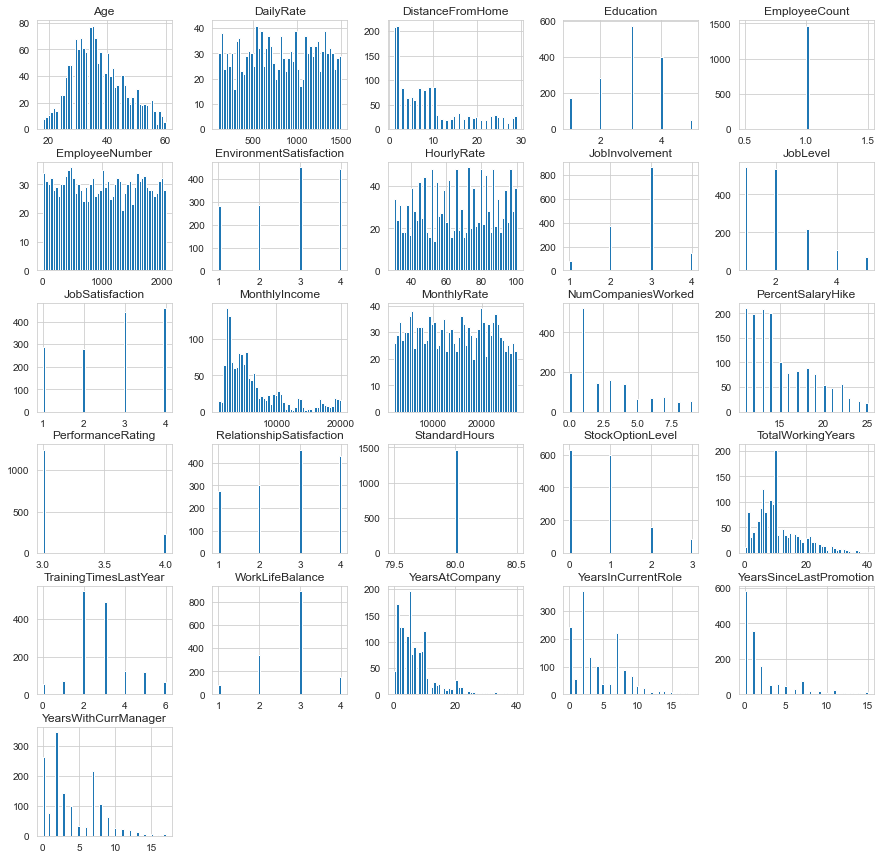

In [83]:
df_hr.hist(figsize=(15,15),bins=50)
plt.show()

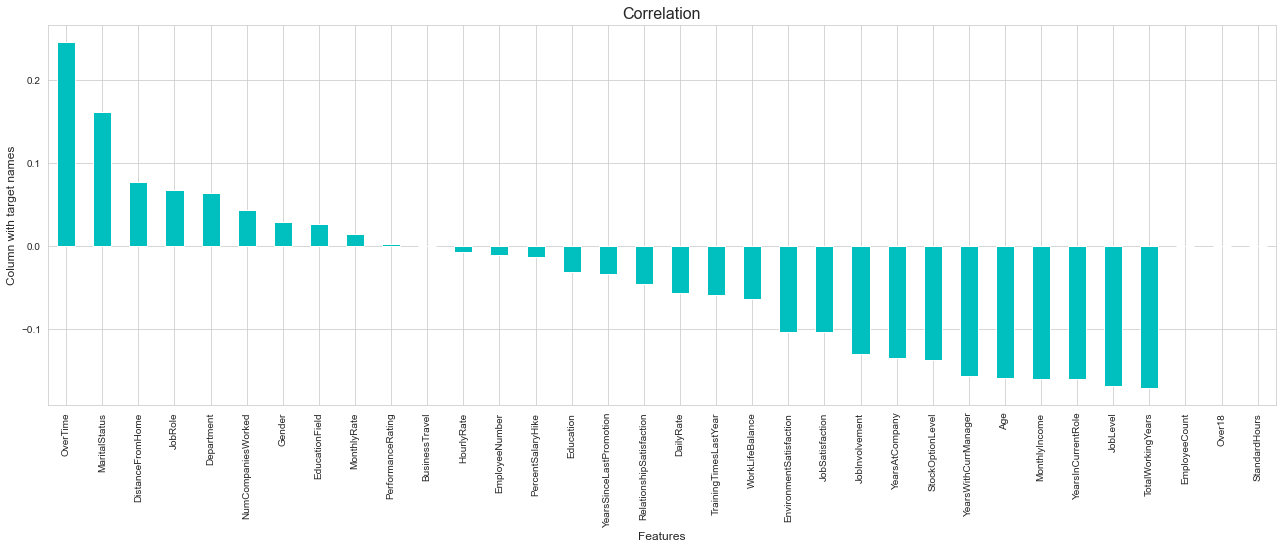

In [172]:
plt.figure(figsize=(22,7))
df_hr.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=12)
plt.ylabel('Column with target names',fontsize=12)
plt.title('Correlation',fontsize=16)
plt.show()

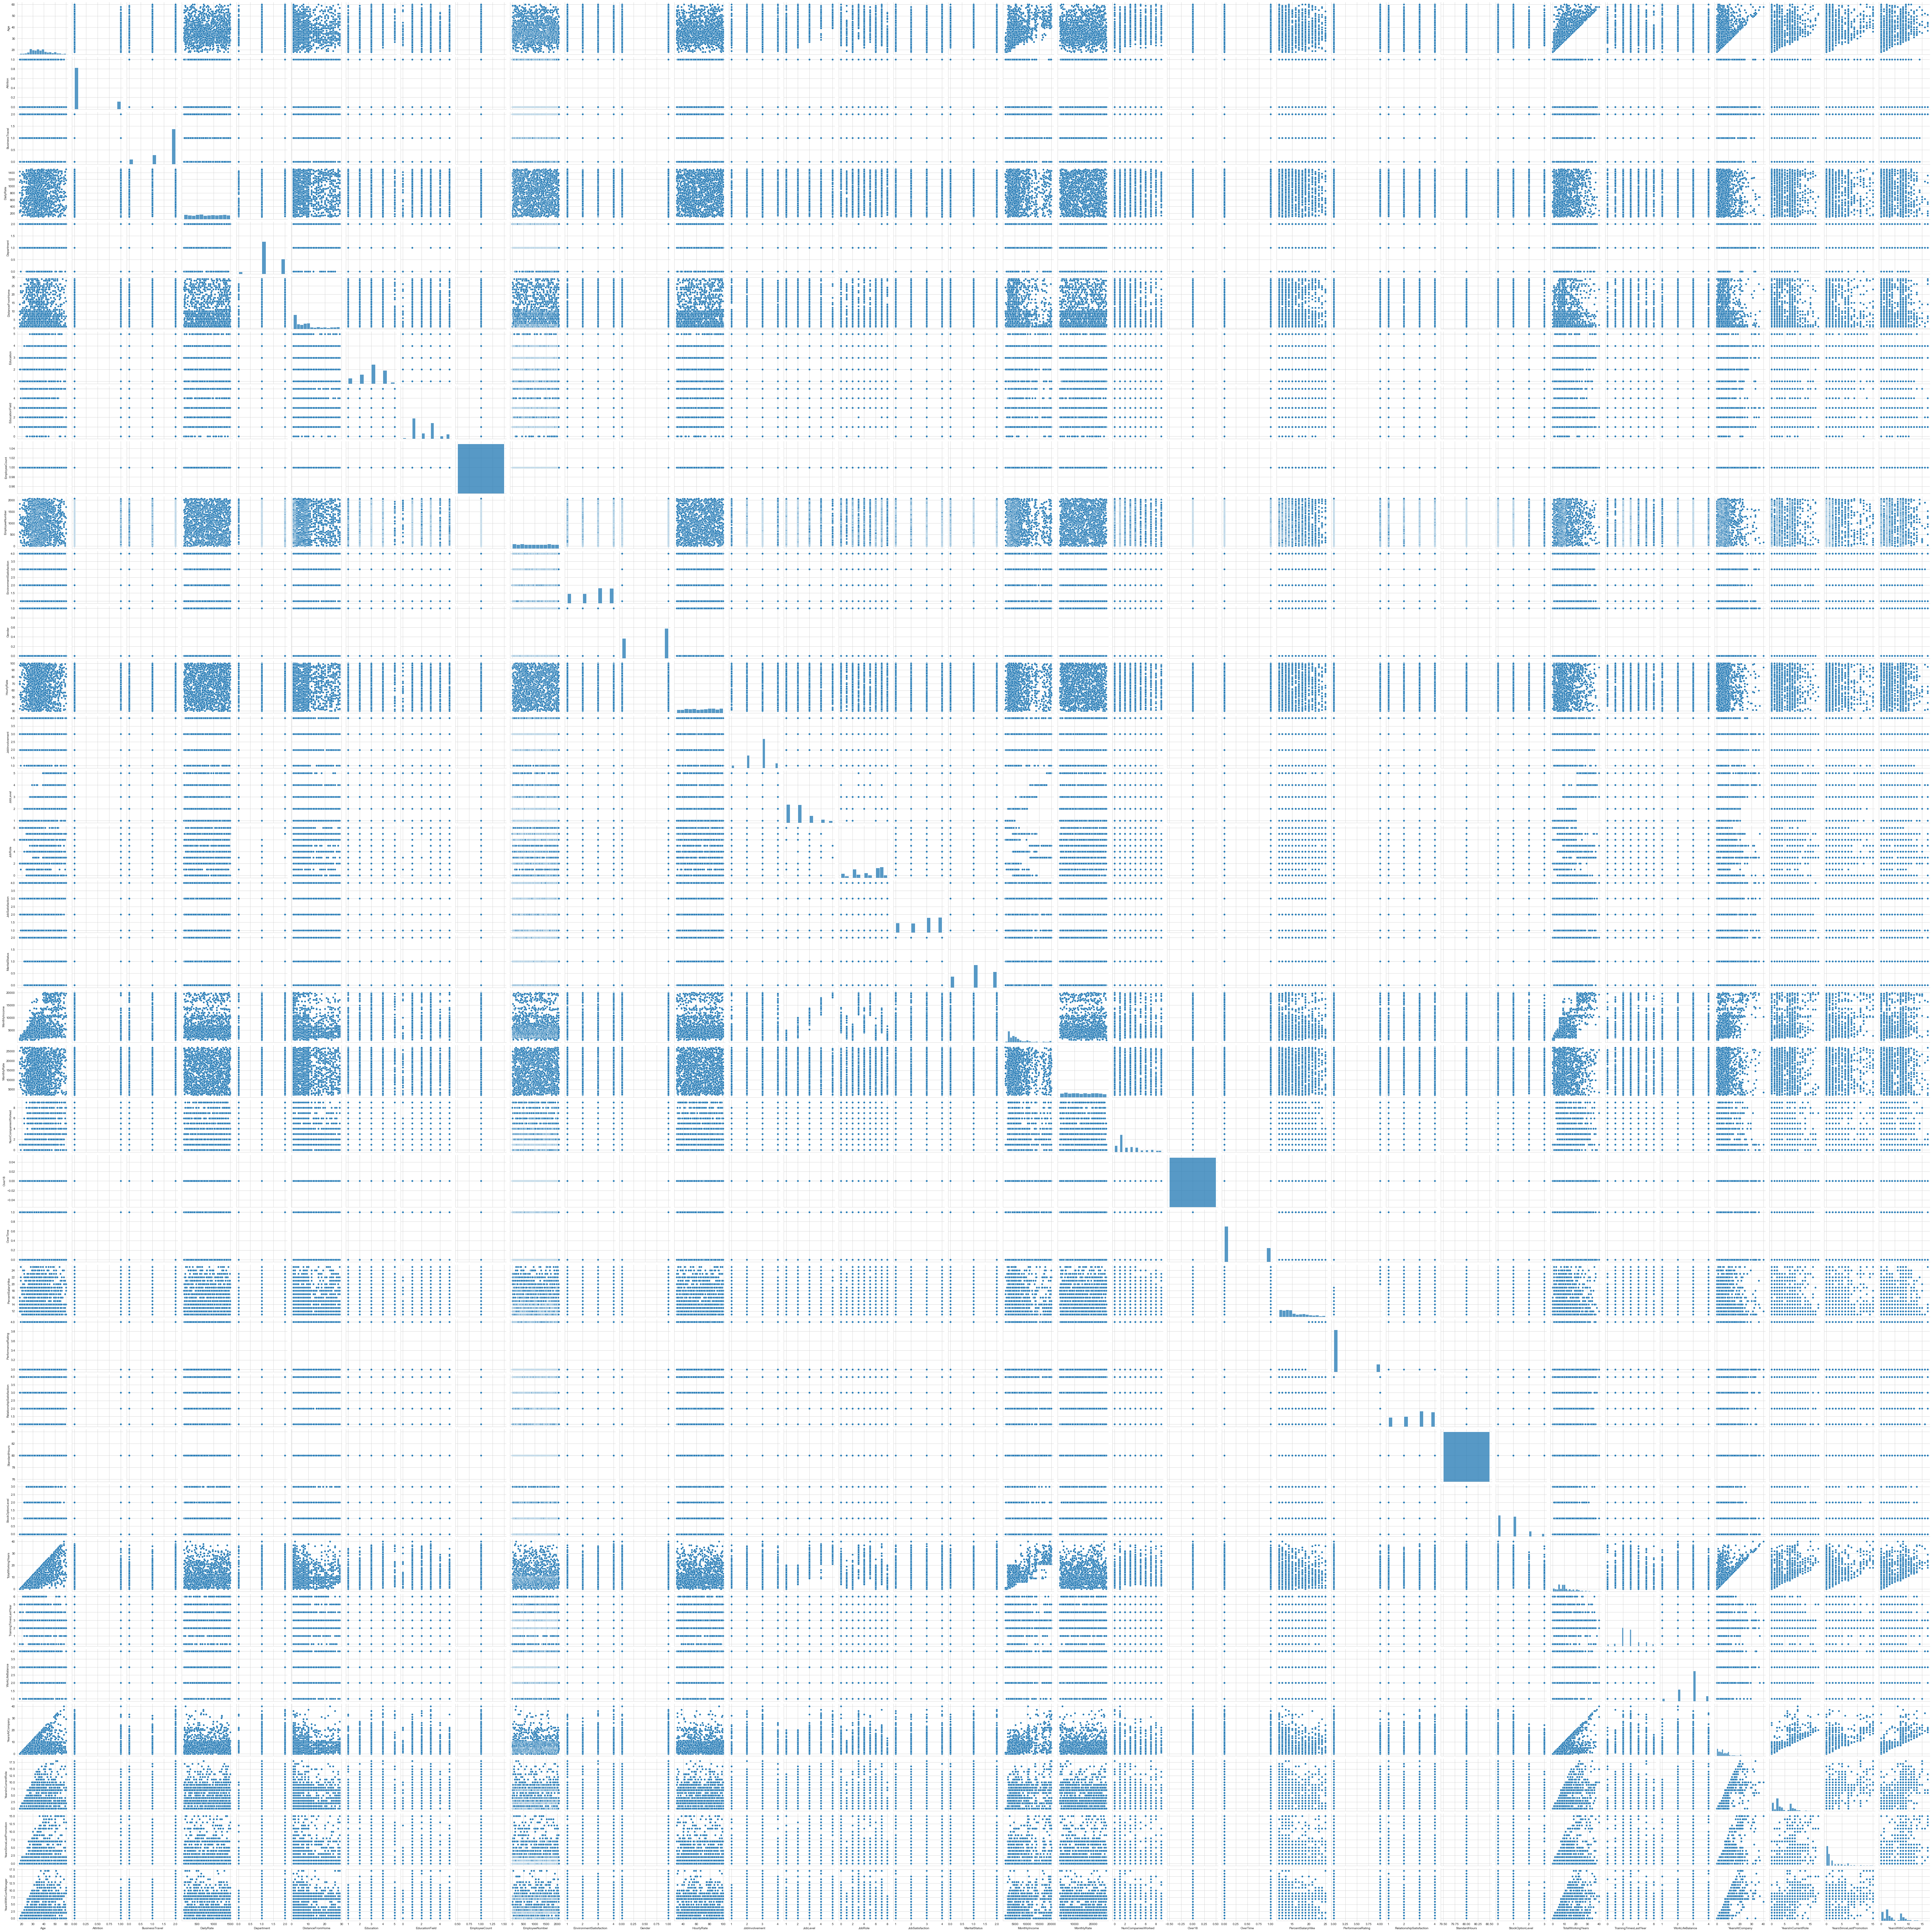

In [173]:
sns.pairplot(df_hr)

# Encoding the Data Frame

In [84]:
df_hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [85]:
df_hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Label Encoder is used to encode the dataframe to make it easier to build the model.

In [86]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [87]:
df_hr['Attrition'] = le.fit_transform(df_hr['Attrition'])
df_hr['BusinessTravel'] = le.fit_transform(df_hr['BusinessTravel'])
df_hr['Department'] = le.fit_transform(df_hr['Department'])
df_hr['EducationField'] = le.fit_transform(df_hr['EducationField'])
df_hr['Gender'] = le.fit_transform(df_hr['Gender'])
df_hr['JobRole'] = le.fit_transform(df_hr['JobRole'])
df_hr['MaritalStatus'] = le.fit_transform(df_hr['MaritalStatus'])
df_hr['OverTime'] = le.fit_transform(df_hr['OverTime'])
df_hr['Over18'] = le.fit_transform(df_hr['Over18'])

In [88]:
df_hr

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               2       1102           2                 1   
1      49          0               1        279           1                 8   
2      37          1               2       1373           1                 2   
3      33          0               1       1392           1                 3   
4      27          0               2        591           1                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0               1        884           1                23   
1466   39          0               2        613           1                 6   
1467   27          0               2        155           1                 4   
1468   49          0               1       1023           2                 2   
1469   34          0               2        628           1                 8   

      Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
0             2               1              1               1  ...   
1             1               1              1               2  ...   
2             2               4              1               4  ...   
3             4               1              1               5  ...   
4             1               3              1               7  ...   
...         ...             ...            ...             ...  ...   
1465          2               3              1            2061  ...   
1466          1               3              1            2062  ...   
1467          3               1              1            2064  ...   
1468          3               3              1            2065  ...   
1469          3               3              1            2068  ...   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                            1             80                 0   
1                            4             80                 1   
2                            2             80                 0   
3                            3             80                 0   
4                            4             80                 1   
...                        ...            ...               ...   
1465                         3             80                 1   
1466                         1             80                 1   
1467                         2             80                 1   
1468                         4             80                 0   
1469                         1             80                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1465               5                   2                        0   
1466              

# VIF

In [89]:
vif_data= df_hr.drop('Attrition',axis=1)

In [90]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_hr_sc= sc.fit_transform(vif_data)

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
VIF= pd.DataFrame()
VIF['features']= vif_data.columns

In [93]:
VIF['VIF']= [variance_inflation_factor(df_hr_sc,i) for i in range(len(vif_data.columns))]

In [94]:
VIF

features        VIF
0                        Age   2.054226
1             BusinessTravel   1.016808
2                  DailyRate   1.026401
3                 Department   1.942165
4           DistanceFromHome   1.018096
5                  Education   1.065295
6             EducationField   1.016240
7              EmployeeCount        NaN
8             EmployeeNumber   1.022699
9    EnvironmentSatisfaction   1.018022
10                    Gender   1.020038
11                HourlyRate   1.021984
12            JobInvolvement   1.020836
13                  JobLevel  11.825039
14                   JobRole   1.894366
15           JobSatisfaction   1.022894
16             MaritalStatus   1.844040
17             MonthlyIncome  11.055038
18               MonthlyRate   1.015803
19        NumCompaniesWorked   1.261958
20                    Over18        NaN
21                  OverTime   1.028856
22         PercentSalaryHike   2.521583
23         PerformanceRating   2.519973
24  RelationshipSatisfaction   1.025574
25             StandardHours        NaN
26          StockOptionLevel   1.828706
27         TotalWorkingYears   4.824457
28     TrainingTimesLastYear   1.024312
29           WorkLifeBalance   1.018572
30            YearsAtCompany   4.601995
31        YearsInCurrentRole   2.728269
32   YearsSinceLastPromotion   1.678897
33      YearsWithCurrManager   2.782981

We can see that JobLevel, MonthlyIncome, YearsAtCompany, TotalWorkingYears show high multicollinearity.

# Checking Outliers

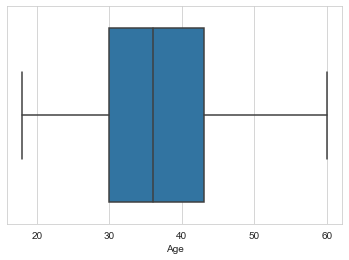

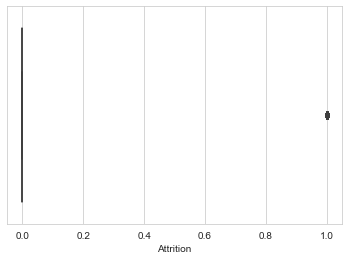

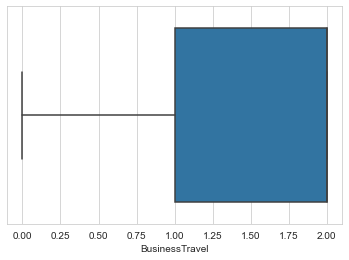

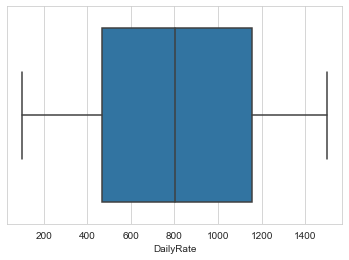

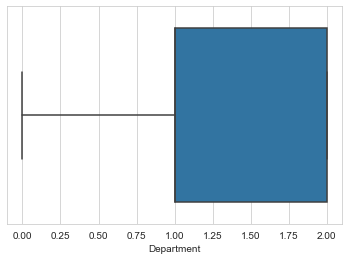

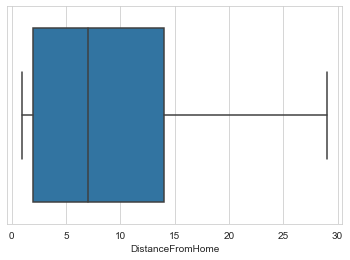

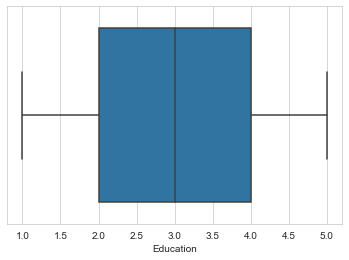

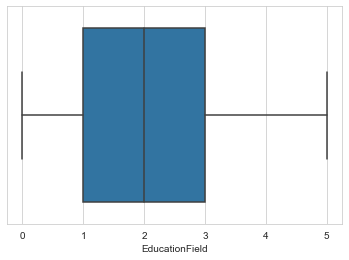

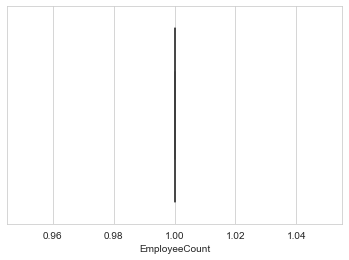

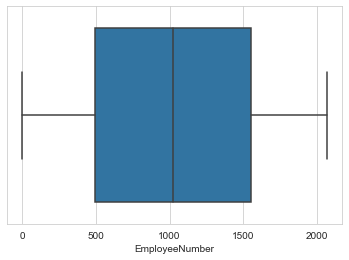

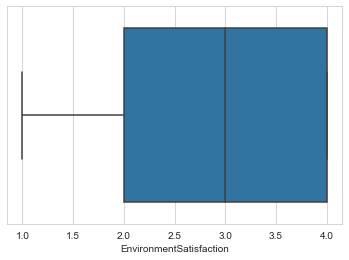

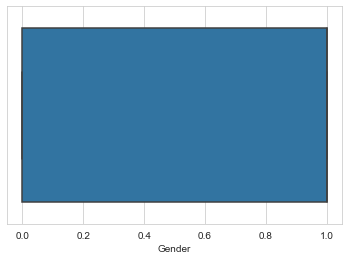

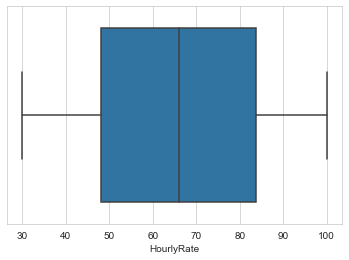

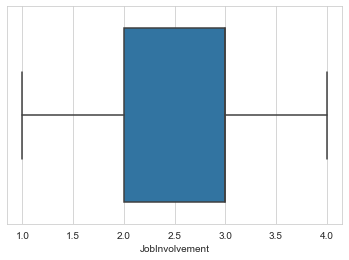

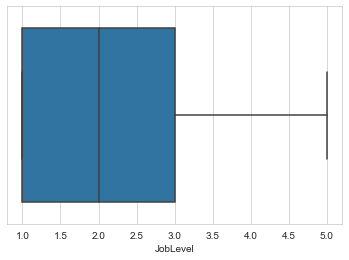

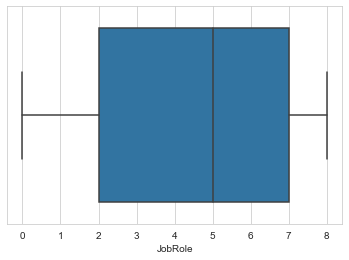

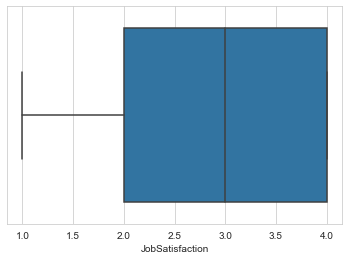

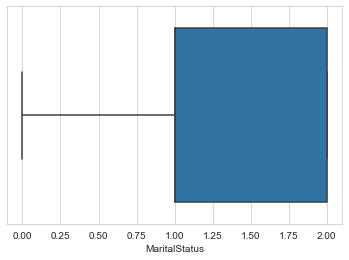

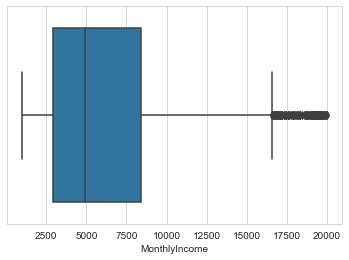

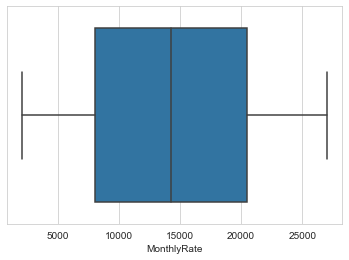

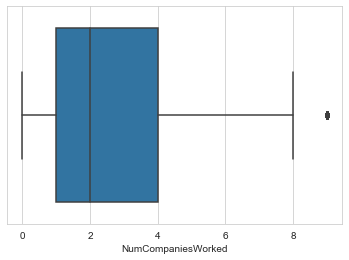

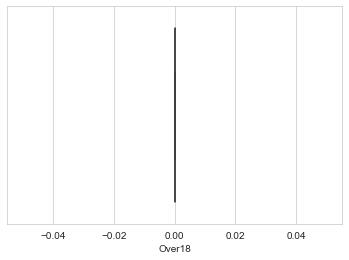

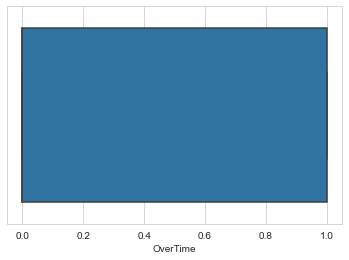

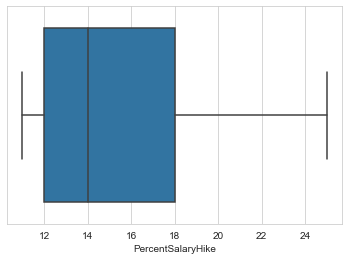

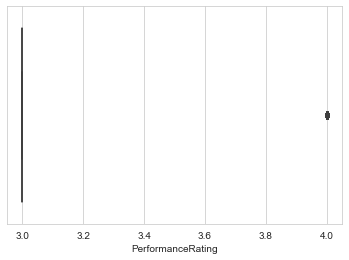

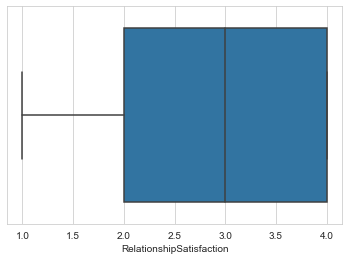

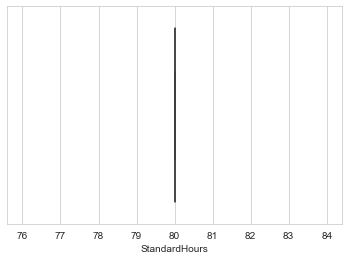

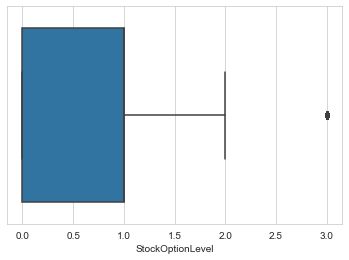

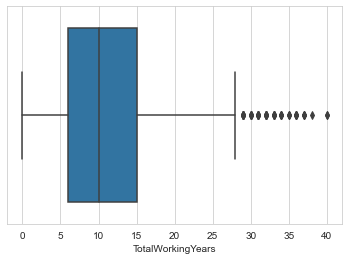

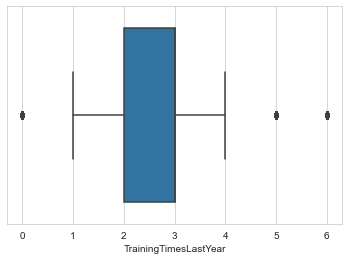

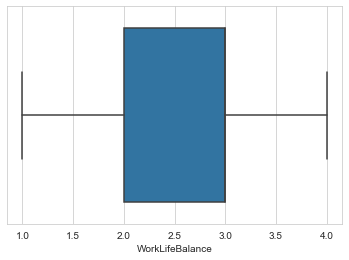

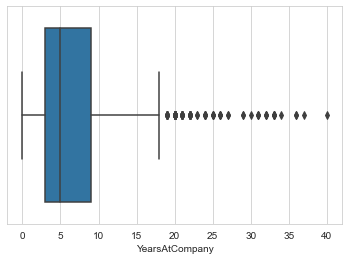

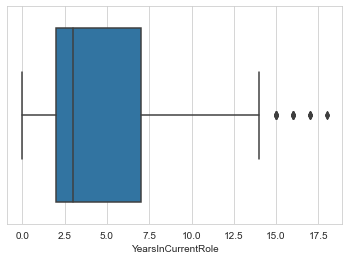

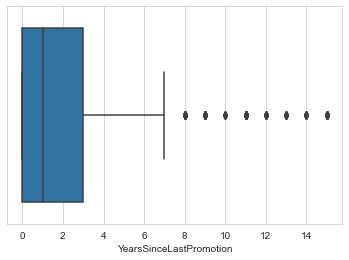

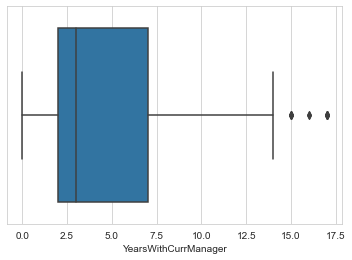

In [95]:
for i in df_hr.columns:
    sns.boxplot(df_hr[i])
    plt.show()

From above boxplots, we can see that there are outliers present in Attrition, MonthlyIncome, NumCompaniesWorked, PerformanceRating, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager.

# Removing Outliers

We shall remove the outliers using Z-Score method.

Attrition, PerformanceRating & StockOptionLevel do not have significant amount of outliers so we will focus on the attributes containing more outliers.

In [96]:
df_outliers=df_hr[["MonthlyIncome", "NumCompaniesWorked", "TotalWorkingYears","TrainingTimesLastYear","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]]

In [97]:
from scipy.stats import zscore
z=np.abs(zscore(df_outliers))
df_new_hr=df_hr[(z<3).all(axis=1)]
df_new_hr

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               2       1102           2                 1   
1      49          0               1        279           1                 8   
2      37          1               2       1373           1                 2   
3      33          0               1       1392           1                 3   
4      27          0               2        591           1                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0               1        884           1                23   
1466   39          0               2        613           1                 6   
1467   27          0               2        155           1                 4   
1468   49          0               1       1023           2                 2   
1469   34          0               2        628           1                 8   

      Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
0             2               1              1               1  ...   
1             1               1              1               2  ...   
2             2               4              1               4  ...   
3             4               1              1               5  ...   
4             1               3              1               7  ...   
...         ...             ...            ...             ...  ...   
1465          2               3              1            2061  ...   
1466          1               3              1            2062  ...   
1467          3               1              1            2064  ...   
1468          3               3              1            2065  ...   
1469          3               3              1            2068  ...   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                            1             80                 0   
1                            4             80                 1   
2                            2             80                 0   
3                            3             80                 0   
4                            4             80                 1   
...                        ...            ...               ...   
1465                         3             80                 1   
1466                         1             80                 1   
1467                         2             80                 1   
1468                         4             80                 0   
1469                         1             80                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1465               5                   2                        0   
1466              

In [98]:
df_new_hr.shape

(1387, 35)

In [99]:
df_hr.shape

(1470, 35)

In [100]:
Data_loss=((1470-1387)/1470)*100
Data_loss

5.646258503401361

After using zscore to remove outliers the data loss is 5.65%. I can proceed with zscore since Zscore is giving me less data loss.

# Skewness

In [101]:
df_new_hr.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EmployeeCount               0.000000
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
Over18                      0.000000
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StandardHours               0.000000
S

Skewness is found in: DistanceFromHome, JobLevel, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, & YearsWithCurrManager.

In [102]:
df_skew=["DistanceFromHome","MonthlyIncome","NumCompaniesWorked","PercentSalaryHike","TotalWorkingYears","TrainingTimesLastYear","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]

In [103]:
from sklearn.preprocessing import PowerTransformer
scal = PowerTransformer(method='yeo-johnson')

In [104]:
df_new_hr[df_skew] = scal.fit_transform(df_new_hr[df_skew].values)

In [105]:
df_new_hr[df_skew].skew()

DistanceFromHome          -0.008149
MonthlyIncome              0.027700
NumCompaniesWorked         0.016175
PercentSalaryHike          0.112128
TotalWorkingYears         -0.009666
TrainingTimesLastYear      0.057949
YearsAtCompany            -0.025230
YearsInCurrentRole        -0.069631
YearsSinceLastPromotion    0.212301
YearsWithCurrManager      -0.070570
dtype: float64

Skewness is removed.

# Model Building

In [106]:
x = df_new_hr.drop("Attrition",axis=1)
y = df_new_hr["Attrition"]

In [107]:
x.shape

(1387, 34)

In [108]:
y.shape

(1387,)

In [109]:
y.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

In [110]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

# SMOTE

In [111]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_over, y_over = sm.fit_resample(x,y)

In [112]:
y_over.value_counts()

0    1158
1    1158
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

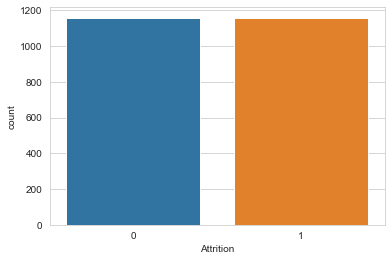

In [113]:
# Visualizing the data after oversampling
sns.countplot(y_over)

We have balanced the data using SMOTE.

# Best Random State

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [118]:
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.25, random_state = i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predrs=lr.predict(x_test)
    acc=accuracy_score(y_test,predrs)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is :",maxAccu," on Random State :",maxRS)

Best accuracy is : 0.9106628242074928  on Random State : 109


In [119]:
# dividing the dataset for training and testing with best random state
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.25, random_state = 109)

In [120]:
x_train.shape

(1040, 34)

In [121]:
y_train.shape

(1040,)

In [122]:
x_test.shape

(347, 34)

In [123]:
y_test.shape

(347,)

In [124]:
# scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Logistic Regression

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [126]:
lg=LogisticRegression()
lg.fit(x_train, y_train)
lg.score(x_train, y_train)
pred_lg=lg.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_lg))
print(confusion_matrix(y_test,pred_lg))
print(classification_report(y_test,pred_lg))

accuracy score:  0.9020172910662824
[[290   9]
 [ 25  23]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       299
           1       0.72      0.48      0.57        48

    accuracy                           0.90       347
   macro avg       0.82      0.72      0.76       347
weighted avg       0.89      0.90      0.89       347



# Decision Tree Classifier

In [127]:
from sklearn.tree import DecisionTreeClassifier

In [128]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
pred_dtc=dtc.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

accuracy score:  0.8069164265129684
[[261  38]
 [ 29  19]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       299
           1       0.33      0.40      0.36        48

    accuracy                           0.81       347
   macro avg       0.62      0.63      0.62       347
weighted avg       0.82      0.81      0.81       347



# KNearest Neighbors Classifier

In [129]:
from sklearn.neighbors import KNeighborsClassifier

In [130]:
knn=KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
pred_knn=knn.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

accuracy score:  0.8760806916426513
[[297   2]
 [ 41   7]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       299
           1       0.78      0.15      0.25        48

    accuracy                           0.88       347
   macro avg       0.83      0.57      0.59       347
weighted avg       0.86      0.88      0.84       347



# GaussianNB Classifier

In [131]:
from sklearn.naive_bayes import GaussianNB

In [132]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
pred_gnb=gnb.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_gnb))
print(confusion_matrix(y_test,pred_gnb))
print(classification_report(y_test,pred_gnb))

accuracy score:  0.8242074927953891
[[257  42]
 [ 19  29]]
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       299
           1       0.41      0.60      0.49        48

    accuracy                           0.82       347
   macro avg       0.67      0.73      0.69       347
weighted avg       0.86      0.82      0.84       347



# Support Vector Machine

In [133]:
from sklearn.svm import SVC

In [134]:
svc = SVC()
svc.fit(x_train, y_train)
svc.score(x_train, y_train)
svc_pred = svc.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

accuracy score:  0.8818443804034583
[[295   4]
 [ 37  11]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       299
           1       0.73      0.23      0.35        48

    accuracy                           0.88       347
   macro avg       0.81      0.61      0.64       347
weighted avg       0.87      0.88      0.85       347



# Random Forest Classifier

In [135]:
from sklearn.ensemble import RandomForestClassifier

In [136]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
pred_rfc=rfc.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

accuracy score:  0.8904899135446686
[[298   1]
 [ 37  11]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       299
           1       0.92      0.23      0.37        48

    accuracy                           0.89       347
   macro avg       0.90      0.61      0.65       347
weighted avg       0.89      0.89      0.86       347



# Gradient Boosting Classifier

In [137]:
from sklearn.ensemble import GradientBoostingClassifier

In [138]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
pred_gcb=gbc.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_gcb))
print(confusion_matrix(y_test,pred_gcb))
print(classification_report(y_test,pred_gcb))

accuracy score:  0.8847262247838616
[[291   8]
 [ 32  16]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       299
           1       0.67      0.33      0.44        48

    accuracy                           0.88       347
   macro avg       0.78      0.65      0.69       347
weighted avg       0.87      0.88      0.87       347



From the above algorithms, we see that Logistic Regression and Random Forest Classifier have the highest accuracy scores among others. Followed by SVC, KNearest Neighbor Classifier & Gradient Boosting Classifier. GaussianNB and Decision Tree Classifier have the lowest accuracy scores among others.

# Cross Validation Score

In [139]:
from sklearn.model_selection import cross_val_score

In [140]:
scr_lg=cross_val_score(lg,x,y,cv=5)
print("Cross validation score of this model is: ",scr_lg.mean())

Cross validation score of this model is:  0.873825416201335


In [141]:
scr_dtc=cross_val_score(dtc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_dtc.mean())

Cross validation score of this model is:  0.7663896319767292


In [142]:
scr_knn=cross_val_score(knn,x,y,cv=5)
print("Cross validation score of this model is: ",scr_knn.mean())

Cross validation score of this model is:  0.8442770693192738


In [143]:
scr_gnb=cross_val_score(gnb,x,y,cv=5)
print("Cross validation score of this model is: ",scr_gnb.mean())

Cross validation score of this model is:  0.81903488039893


In [144]:
scr_svc=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_svc.mean())

Cross validation score of this model is:  0.8637430849544192


In [145]:
scr_rfc=cross_val_score(rfc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_rfc.mean())

Cross validation score of this model is:  0.8507466950627224


In [146]:
scr_gbc=cross_val_score(gbc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_gbc.mean())

Cross validation score of this model is:  0.8615614367711606


In the Cross Validation Scores, once again Logistic Regression has the highest CV score followed by SVC & Gradient Boosting Classifier. Next, Random Forest Classifier and KNearest Neighbors Classifier and lastly, GaussianNB & Decision Tree Classifier.

# Hyper Parameter Tuning

Since the scores of Logistic Regression, SVC, Gradient Boosting Classifier are high we shall consider these for hyper parameter tuning.

In [147]:
# Using GridSearchCV for hyper parameter tuning
from sklearn.model_selection import GridSearchCV

# Logistic Regression

In [148]:
parameters={
    'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
    'random_state':[1,2,3,4,None],
    'C': [0.8,0.9,1,1.1,1.2,1.3,1.4],
    'penalty':['l1','l2','elasticnet','none']}
grid_lg = GridSearchCV(lg, param_grid = parameters, scoring = 'accuracy', cv = 10)

In [149]:
grid_lg.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [1, 2, 3, 4, None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [150]:
grid_lg.best_params_

{'C': 0.8, 'penalty': 'l1', 'random_state': 1, 'solver': 'liblinear'}

In [151]:
lg1=LogisticRegression(solver='liblinear',random_state=1,C=0.8,penalty='l1')

lg1.fit(x_train, y_train)
lg1.score(x_train, y_train)
pred_lg1=lg.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_lg1))
print(confusion_matrix(y_test,pred_lg1))
print(classification_report(y_test,pred_lg1))

accuracy score:  0.9020172910662824
[[290   9]
 [ 25  23]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       299
           1       0.72      0.48      0.57        48

    accuracy                           0.90       347
   macro avg       0.82      0.72      0.76       347
weighted avg       0.89      0.90      0.89       347



# SVC

In [154]:
parameters1 = {
    'C': [0.6,0.8,1,1.2,1.4],
    'kernel':['linear', 'rbf','poly'],
    'degree':[1,2,3],
    'random_state':[1,2,3,None],
    'gamma' :[0.8,0.9,1,1.1,1.2]}
grid_svc = GridSearchCV(svc, param_grid = parameters1, scoring = 'accuracy', cv = 10)

In [155]:
grid_svc.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.6, 0.8, 1, 1.2, 1.4], 'degree': [1, 2, 3],
                         'gamma': [0.8, 0.9, 1, 1.1, 1.2],
                         'kernel': ['linear', 'rbf', 'poly'],
                         'random_state': [1, 2, 3, None]},
             scoring='accuracy')

In [156]:
grid_svc.best_params_

{'C': 0.6, 'degree': 1, 'gamma': 0.8, 'kernel': 'linear', 'random_state': 1}

In [157]:
svc1=SVC(C=0.6,gamma=0.8,kernel='linear',degree=1,random_state=1)

svc1.fit(x_train,y_train)
pred1=svc1.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))

accuracy score:  0.9077809798270894
[[294   5]
 [ 27  21]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       299
           1       0.81      0.44      0.57        48

    accuracy                           0.91       347
   macro avg       0.86      0.71      0.76       347
weighted avg       0.90      0.91      0.90       347



# Random Forest Classifier

In [158]:
parameters2={
    'bootstrap': [True, False],
    'max_depth': [10, 20],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split':[1,2,3,4],
    'criterion':['gini','entropy'],
    'n_estimators': [100,200,300]}
grid_rfc = GridSearchCV(rfc, param_grid = parameters2, scoring = 'accuracy', cv = 10)

In [159]:
grid_rfc.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [160]:
grid_rfc.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_split': 4,
 'n_estimators': 300}

In [161]:
rfc1=RandomForestClassifier(bootstrap=True,max_depth=10,max_features='auto',n_estimators=300,criterion='gini',min_samples_split=4)

rfc1.fit(x_train,y_train)
pred_rf1=rfc1.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,pred_rf1))
print(confusion_matrix(y_test,pred_rf1))
print(classification_report(y_test,pred_rf1))

accuracy score:  0.8789625360230547
[[297   2]
 [ 40   8]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       299
           1       0.80      0.17      0.28        48

    accuracy                           0.88       347
   macro avg       0.84      0.58      0.60       347
weighted avg       0.87      0.88      0.84       347



# Gradient Boosting Classifier

In [162]:
parameters3={
    'loss': ['log_loss','deviance','exponential'],
    'learning_rate': [0.1,0.2,0.3,0.4],
    'max_features': ['auto', 'sqrt'],
    'criterion':['friedman_mse','squared_error','mse'],
    'n_estimators': [100,200,300]}
grid_gbc = GridSearchCV(gbc, param_grid = parameters3, scoring = 'accuracy', cv = 10)

In [163]:
grid_gbc.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [164]:
grid_gbc.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.1,
 'loss': 'exponential',
 'max_features': 'sqrt',
 'n_estimators': 200}

In [165]:
gbc1=GradientBoostingClassifier(loss='exponential',max_features='sqrt',n_estimators=200,criterion='squared_error',learning_rate=0.1)

gbc1.fit(x_train,y_train)
pred_gb1=gbc1.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,pred_gb1))
print(confusion_matrix(y_test,pred_gb1))
print(classification_report(y_test,pred_gb1))

accuracy score:  0.9020172910662824
[[296   3]
 [ 31  17]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       299
           1       0.85      0.35      0.50        48

    accuracy                           0.90       347
   macro avg       0.88      0.67      0.72       347
weighted avg       0.90      0.90      0.88       347



After Hyper Parameter Tuning we can see that SVC has the highest accuracy score.

# ROC-AUC Curve

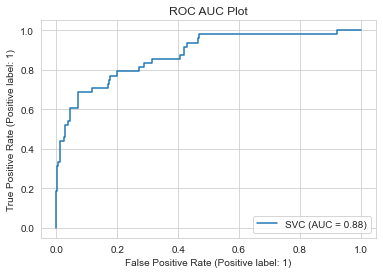

In [166]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc1,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

AUC score of SVC after hyper parameter tuning is 88 %.

# Saving Model

In [169]:
import joblib
joblib.dump(svc1,"HR_Analytics_Project.pkl")

['HR_Analytics_Project.pkl']

# Prediction

In [170]:
# Loading the saved model
hr_model=joblib.load("HR_Analytics_Project.pkl")

#Prediction
prediction = hr_model.predict(x_test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [171]:
pd.DataFrame([hr_model.predict(x_test)[:],y_test[:]],index=["Predicted Value","Actual Value"])

0    1    2    3    4    5    6    7    8    9    ...  337  \
Predicted Value    0    0    0    0    0    0    0    0    0    0  ...    0   
Actual Value       0    0    0    0    0    0    1    0    0    1  ...    0   

                 338  339  340  341  342  343  344  345  346  
Predicted Value    0    0    0    0    0    0    0    1    1  
Actual Value       0    1    0    0    0    0    1    1    1  

[2 rows x 347 columns]